# **WINE QUALITY PREDICTION**


# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Data Collection

In [2]:
df = pd.read_csv("/content/winequality-red.csv")

In [3]:
# display rows and columns 
df.shape

(1599, 12)

# Data Analysis and Visualization

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


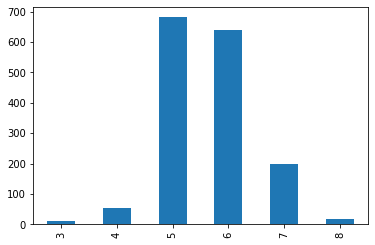

In [8]:
# number of values for each Quality
# 3, 4 = poor quality
# 5, 6 = medium quality 
# 7, 8 = high quality 
df['quality'].value_counts().sort_index().plot(kind='bar');

In [9]:
df['quality'].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

# Features VS Quality

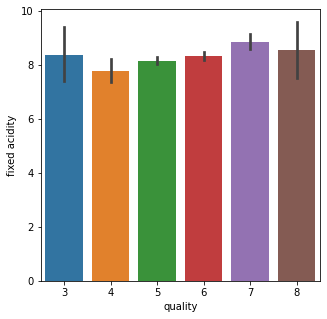

In [10]:
# Fixed acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'fixed acidity', data = df)

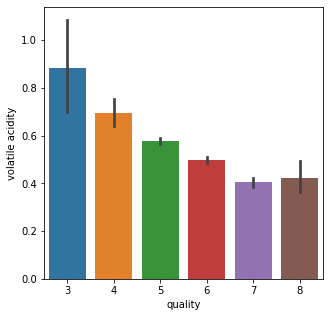

In [11]:
# Volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = df)

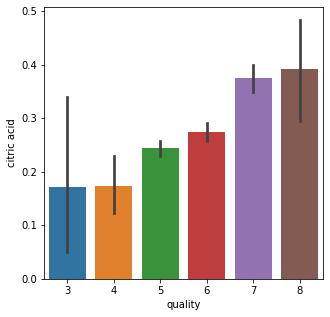

In [12]:
# Citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = df)

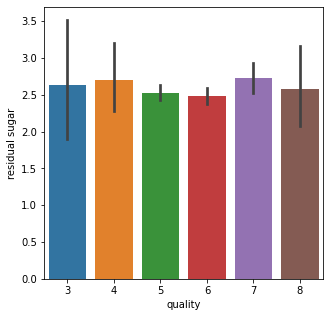

In [13]:
# Residual sugar vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'residual sugar', data = df)

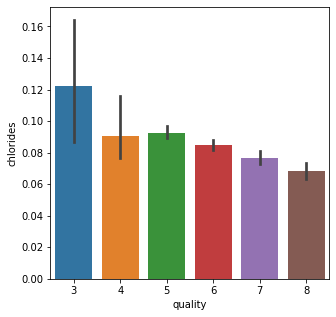

In [14]:
# Chlorides vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'chlorides', data = df)

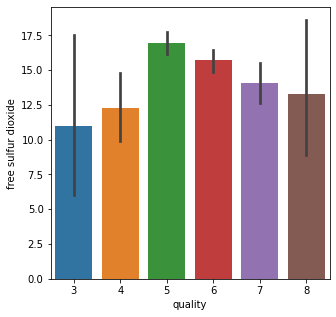

In [15]:
# Free sulfur dioxide vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'free sulfur dioxide', data = df)

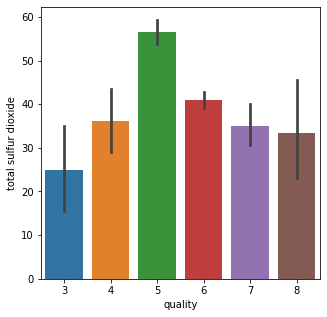

In [16]:
# Total sulfur dioxide vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'total sulfur dioxide', data = df)

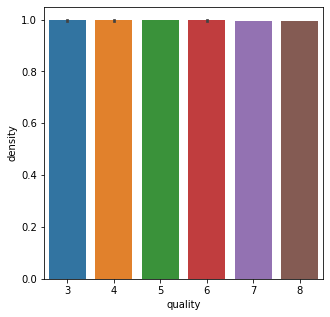

In [17]:
# Density vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'density', data = df)

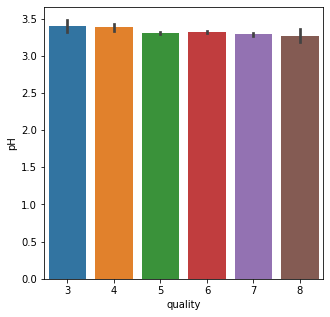

In [18]:
# pH vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'pH', data = df)

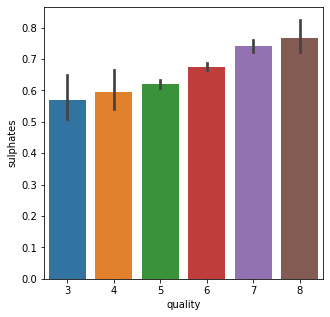

In [19]:
# Sulphates vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'sulphates', data = df)

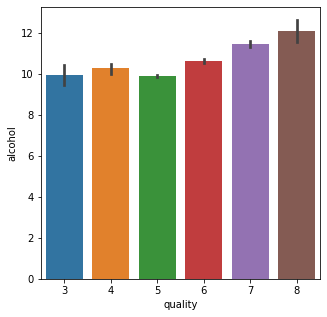

In [20]:
# Alcohol vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'alcohol', data = df)

# Correlation

In [21]:
correlations = df.corr()['quality'].drop('quality').sort_values(ascending=False)
print(correlations)

alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


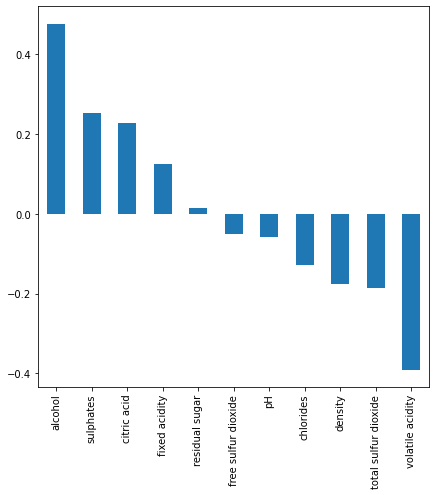

In [22]:
plot = plt.figure(figsize=(7,7))
correlations.plot(kind='bar')

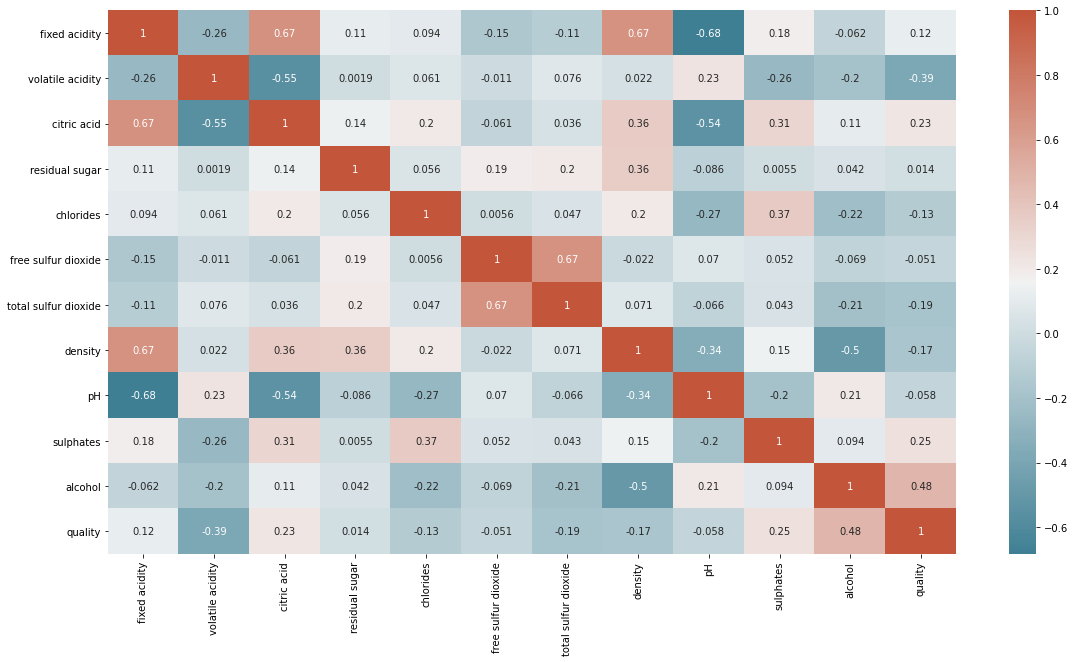

In [23]:
plt.subplots(figsize=(19,10))
sns.heatmap(df.corr(), annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

# Data preprocessing

In [24]:
# Select dependent features 
def get_features(correlation_threashold):
  abs_corrs = correlations.abs()
  high_correlations = abs_corrs[abs_corrs>correlation_threashold].index.values.tolist()
  return high_correlations

In [25]:
features = get_features(0.2)
print(features)
x = df[features]
y = df['quality']

['alcohol', 'sulphates', 'citric acid', 'volatile acidity']


# Train & Test split

In [26]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state=0)

In [27]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(1279, 4) (1279,) (320, 4) (320,)


# Linear Regression

In [28]:
Lin = LinearRegression()
Lin.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
Lin.intercept_

2.653139731965549

In [30]:
Lin.coef_

array([ 0.31487593,  0.67128956, -0.07662679, -1.33440129])

In [31]:
pred_y = Lin.predict(test_x)

In [32]:
df1 = pd.DataFrame({'Actual': test_y, 'Predicted': pred_y}).head(25)
df1

,Actual,Predicted
1109,6,5.903862
1032,5,4.937523
1002,7,6.488808
487,6,5.195566
979,5,5.712734
1054,6,5.060004
542,5,5.193985
853,6,6.065060
1189,4,4.693131
412,5,5.018066


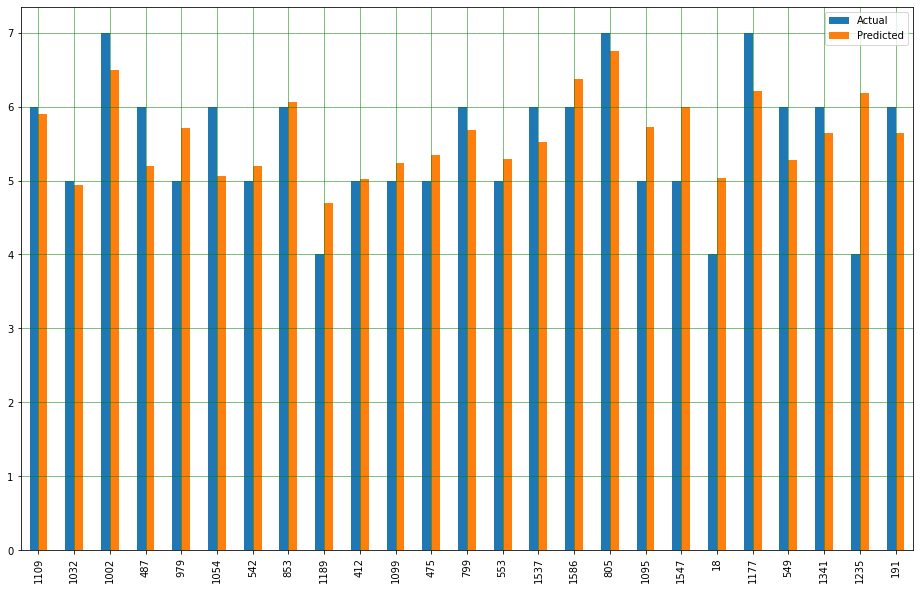

In [33]:
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

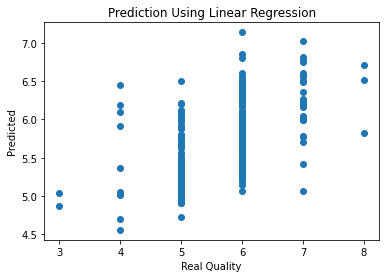

In [34]:
plt.scatter(test_y, pred_y)
plt.title("Prediction Using Linear Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

# Errors

In [35]:
print('Mean Absolute Error:', mae(test_y, pred_y))
print('Mean Squared Error:', mean_squared_error(test_y, pred_y))
print('Root Mean Squared Error:', sqrt(mae(test_y, pred_y)))

Mean Absolute Error: 0.48176850659876125
Mean Squared Error: 0.40092630292327974
Root Mean Squared Error: 0.694095459284068


In [36]:
Lin.score(train_x, train_y)

0.34251095385751046

In [37]:
Lin.score(test_x, test_y)

0.299644261014264

# Optimising the model

In [38]:
# rounding off the predicted values for test set
pred_y = np.round(pred_y)

In [40]:
df2 = pd.DataFrame({'Actual': test_y, 'Predicted': pred_y}).head(25)
df2

,Actual,Predicted
1109,6,6.0
1032,5,5.0
1002,7,6.0
487,6,5.0
979,5,6.0
1054,6,5.0
542,5,5.0
853,6,6.0
1189,4,5.0
412,5,5.0


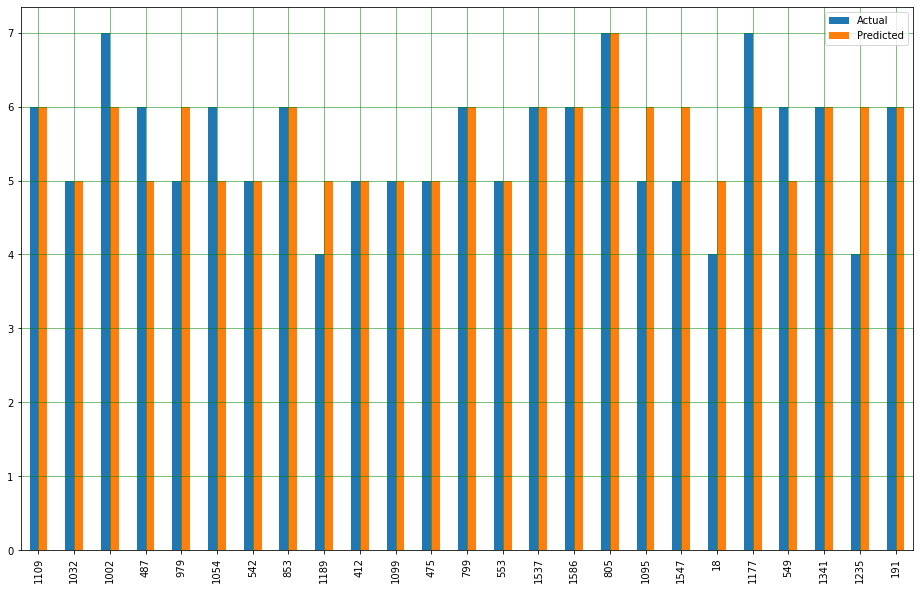

In [41]:
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

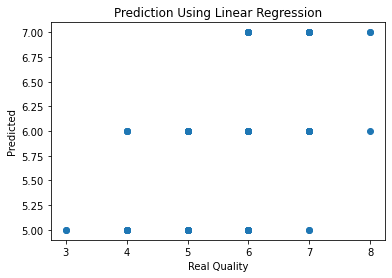

In [42]:
plt.scatter(test_y, pred_y)
plt.title("Prediction Using Linear Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

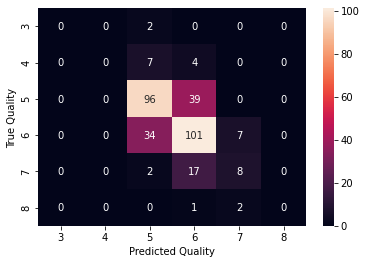

In [43]:
#Confussion Matrix for the Linear Regression Model
label_aux = plt.subplot()
cm_linear_regression = confusion_matrix(test_y, pred_y)
cm_lr = pd.DataFrame(cm_linear_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_lr, annot=True, fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

# New errors

In [44]:
print('Mean Absolute Error:', mae(test_y, pred_y))
print('Mean Squared Error:', mean_squared_error(test_y, pred_y))
print('Root Mean Squared Error:', sqrt(mae(test_y, pred_y)))

Mean Absolute Error: 0.3875
Mean Squared Error: 0.44375
Root Mean Squared Error: 0.6224949798994366


In [45]:
print('Accuracy score:', accuracy_score(test_y, pred_y))

Accuracy score: 0.640625


In [46]:
Lin.score(train_x, train_y)

0.34251095385751046

In [47]:
Lin.score(test_x, test_y)

0.299644261014264

# Output

In [48]:
coeffecients = pd.DataFrame(Lin.coef_,features)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
alcohol,0.314876
sulphates,0.671290
citric acid,-0.076627
volatile acidity,-1.334401
